In [17]:
from pprint import pprint
pprint(['max'])

import numpy as np
# import torch as tc
x = np.array([1., 2.])
# y = tc.Tensor(x)
dir(x)
# dir(y)
# x.var()

['max']


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [33]:
def fn(*arg, **kwarg):
    print(type(arg))
    for a in arg:
        print(f'{a=} {a}')
    for a in kwarg.items():
        print(f'{a=} {a}')

x=1
fn(x)

<class 'tuple'>
a=1 1


In [20]:
getattr(1, 'shape')

AttributeError: 'int' object has no attribute 'shape'

In [40]:
# def wtype(fn):
#     """ applies types to inputs 
#     """
#     args_for_fail = []
#     for name, arg in signature(fn).parameters.items():
#         if arg.default == Parameter.empty:
#             args_for_fail.append(defaults[arg.annotation])
#     def fn_with_typed_inputs():

from inspect import signature, Parameter
from pathlib import Path

def fn(z, x: str, y: Path = 1):
    return x

# signature(fn)





[str, pathlib.Path]

In [12]:
%load_ext autoreload
%autoreload 2

from typing import Any
import numpy as np
import pandas as pd
import pickle as pk
import paramiko
import matplotlib.pyplot as plt
from pathlib import Path

from walle.bureaucrat import load_pk, save_pk, mkdir, find_file, join_and_mkdir, load_yaml
from walle.analysis import plot_setup, plot_format, get_cmap, PlotObj
from walle.server import fetch

paths = load_yaml('../paths.yaml')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
fetch(
    server_dir  = '', 
    avoid       = [],
    match       = [],
    target_dir  = r'',
    print_paths = False,
    pull = False
)

labels = {
    'x': 'x', 
    'y': 'y'
}

plots = [
    PlotObj(x='r', y='y', labels=labels),
    PlotObj(x=np.array(1)),
]

pairs = {
    'x': 'math'
}

xticklabel_pairs = {
    'tanh': r'$\tanh$',
}

root = Path('where is the data')
plot_dir = join_and_mkdir(root, 'results/plots')
plot_name = r'af_comparison.png'

figshape, figsize = (1, 1), (6, 5)
fig, axs = plot_setup(usetex=True, figshape=figshape, figsize=figsize)
if isinstance(axs, np.ndarray): axs = iter(axs.flatten())

colors = get_cmap('plasma')

### DATA EXTRACTION ###
data = []
for path in root.iterdir():
    if path.is_file() and ('res' in path.name):
        d = load_pk(path)
        d = {pairs[k]:d[k] for k in pairs}
        data.append(d)

# pandas
data = pd.DataFrame.from_dict(data)
data = data.groupby(by=pairs['bf_af'])

# groups
j = 1
for i, (name, grp) in enumerate(data, 1):
    if name in xticklabel_pairs.keys():
        x = i
        y = grp['$E$'].mean()
        yerr = grp['$E$'].std()
        line = ax.errorbar(
            [j], 
            [y], 
            yerr=[yerr],
            capsize=5,
            marker='x'          
        )
        j += 1

plot_format(
    ax,
    xlabel=r'$\sigma(\cdot)$',
    ylabel=pairs['e_mean_i50000'],
    xlim=(0, 6),
    xticks=np.arange(1, len(xticklabel_pairs)+1),
    xticklabels=[v for v in xticklabel_pairs.values()],
    aspect=0.75,
)

ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 3), useMathText=True, useOffset=False)
ax.tick_params(
        axis='both', 
        which='minor',
        bottom=False,
    )

plt.title('Activation function comparison', fontsize=12, pad=5)
fig.tight_layout()

plt.savefig(
    join_and_mkdir(plot_dir, plot_name), 
    dpi = parg.dpi, 
    pad_inches = parg.pad_inches, 
    bbox_inches = parg.bbox_inches
)

plt.show()

NameError: name 'plot_setup' is not defined

15


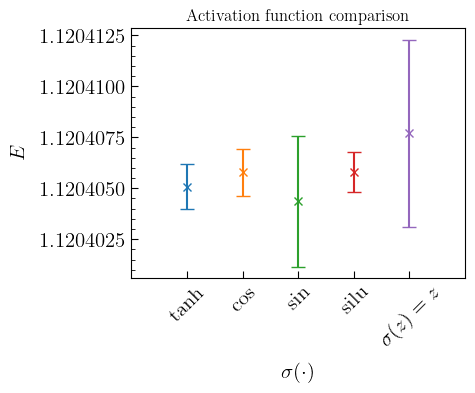

In [20]:
root = Path('./PRX_responses/af/results')
plot_dir = root / 'results/plots'
plot_name = r'af_comparison.png'

pairs = {
    'e_mean_i50000': r'$E$',
    'density_parameter': r'$r_s$',
    'seed': 'seed',
    'bf_af': r'$\sigma(\cdot)$'
}

xticklabel_pairs = {
    'tanh': r'$\tanh$',
    'cos': r'$\cos$', 
    'sin': r'$\sin$', 
    'silu': r'$\mathrm{silu}$', 
    'no_af': r'$\sigma(z) = z$'
}

data = []

for path in root.iterdir():
    if path.is_file():
        d = load_pk(path)
        if 'e_mean_i50000' in d.keys() and not 'e_mean_i100000' in d.keys():

            # print(d.keys())
            d = {pairs[k]:d[k] for k in pairs}
            data.append(d)

print(len(data))

data = pd.DataFrame.from_dict(data)

data = data.groupby(by=pairs['bf_af'])

fig, ax = plot_setup(usetex=True, figshape=(1, 1), figsize=(6, 5))
# axs = iter(axs.flatten())
parg = PlotArgs()

j = 1
for i, (name, grp) in enumerate(data, 1):
    if name in xticklabel_pairs.keys():
        x = i
        y = grp['$E$'].mean()
        yerr = grp['$E$'].std()
        line = ax.errorbar(
            [j], 
            [y], 
            yerr=[yerr],
            capsize=5,
            marker='x'          
        )
        j += 1

plot_format(
    ax,
    xlabel=r'$\sigma(\cdot)$',
    ylabel=pairs['e_mean_i50000'],
    xlim=(0, 6),
    xticks=np.arange(1, len(xticklabel_pairs)+1),
    xticklabels=[v for v in xticklabel_pairs.values()],
    aspect=0.75,
)

ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 3), useMathText=True, useOffset=False)
ax.tick_params(
        axis='both', 
        which='minor',
        bottom=False,
    )

plt.title('Activation function comparison', fontsize=12, pad=5)
fig.tight_layout()

plt.savefig(
    plot_dir / plot_name), 
    dpi = parg.dpi, 
    pad_inches = parg.pad_inches, 
    bbox_inches = parg.bbox_inches
)

plt.show()

In [21]:
fetch(
    server_dir  = '/home/energy/amawi/projects/nn_ansatz/src/experiments/PRX_Responses/runs', 
    # avoid       = ['walkers', 'events', 'models'],
    match = ['res_cusp', 'exp_stats_'],
    target_dir  = r'.\PRX_responses\runs',
    # pull = False,
    print_paths=True,
)

Pulling: 
Server: \home\energy\amawi\projects\nn_ansatz\src\experiments\PRX_Responses\runs\run301115\exp_stats_mom_dist_d3_rs100.pk
Local: PRX_responses\runs\run301115\exp_stats_mom_dist_d3_rs100.pk
Pulling: 
Server: \home\energy\amawi\projects\nn_ansatz\src\experiments\PRX_Responses\runs\run301115\exp_stats_mom_dist_rs100.pk
Local: PRX_responses\runs\run301115\exp_stats_mom_dist_rs100.pk
Pulling: 
Server: \home\energy\amawi\projects\nn_ansatz\src\experiments\PRX_Responses\runs\run301115\exp_stats_one_body_d3_rs100.pk
Local: PRX_responses\runs\run301115\exp_stats_one_body_d3_rs100.pk
Pulling: 
Server: \home\energy\amawi\projects\nn_ansatz\src\experiments\PRX_Responses\runs\run301115\exp_stats_one_body_rs100.pk
Local: PRX_responses\runs\run301115\exp_stats_one_body_rs100.pk
Pulling: 
Server: \home\energy\amawi\projects\nn_ansatz\src\experiments\PRX_Responses\runs\run301115\exp_stats_pair_corr_d3_rs100.pk
Local: PRX_responses\runs\run301115\exp_stats_pair_corr_d3_rs100.pk
Pulling: 
Serve

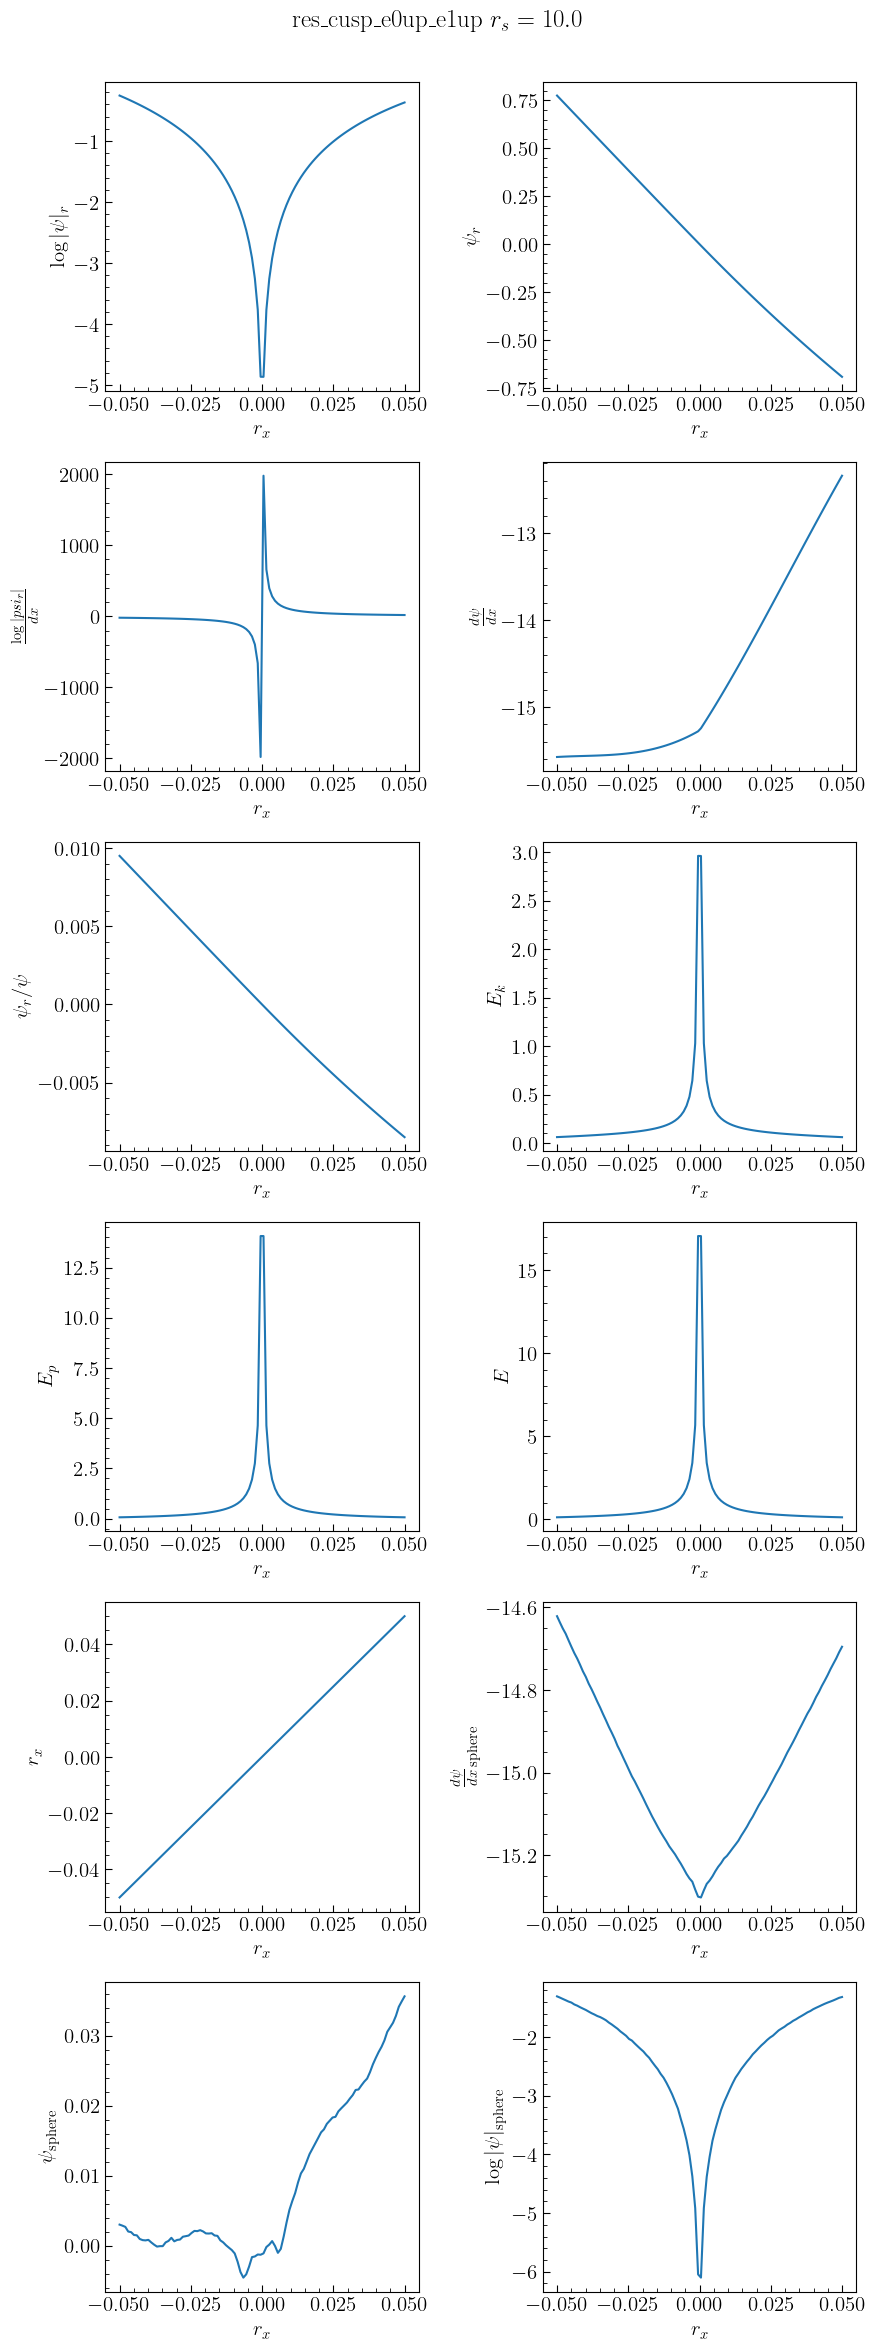

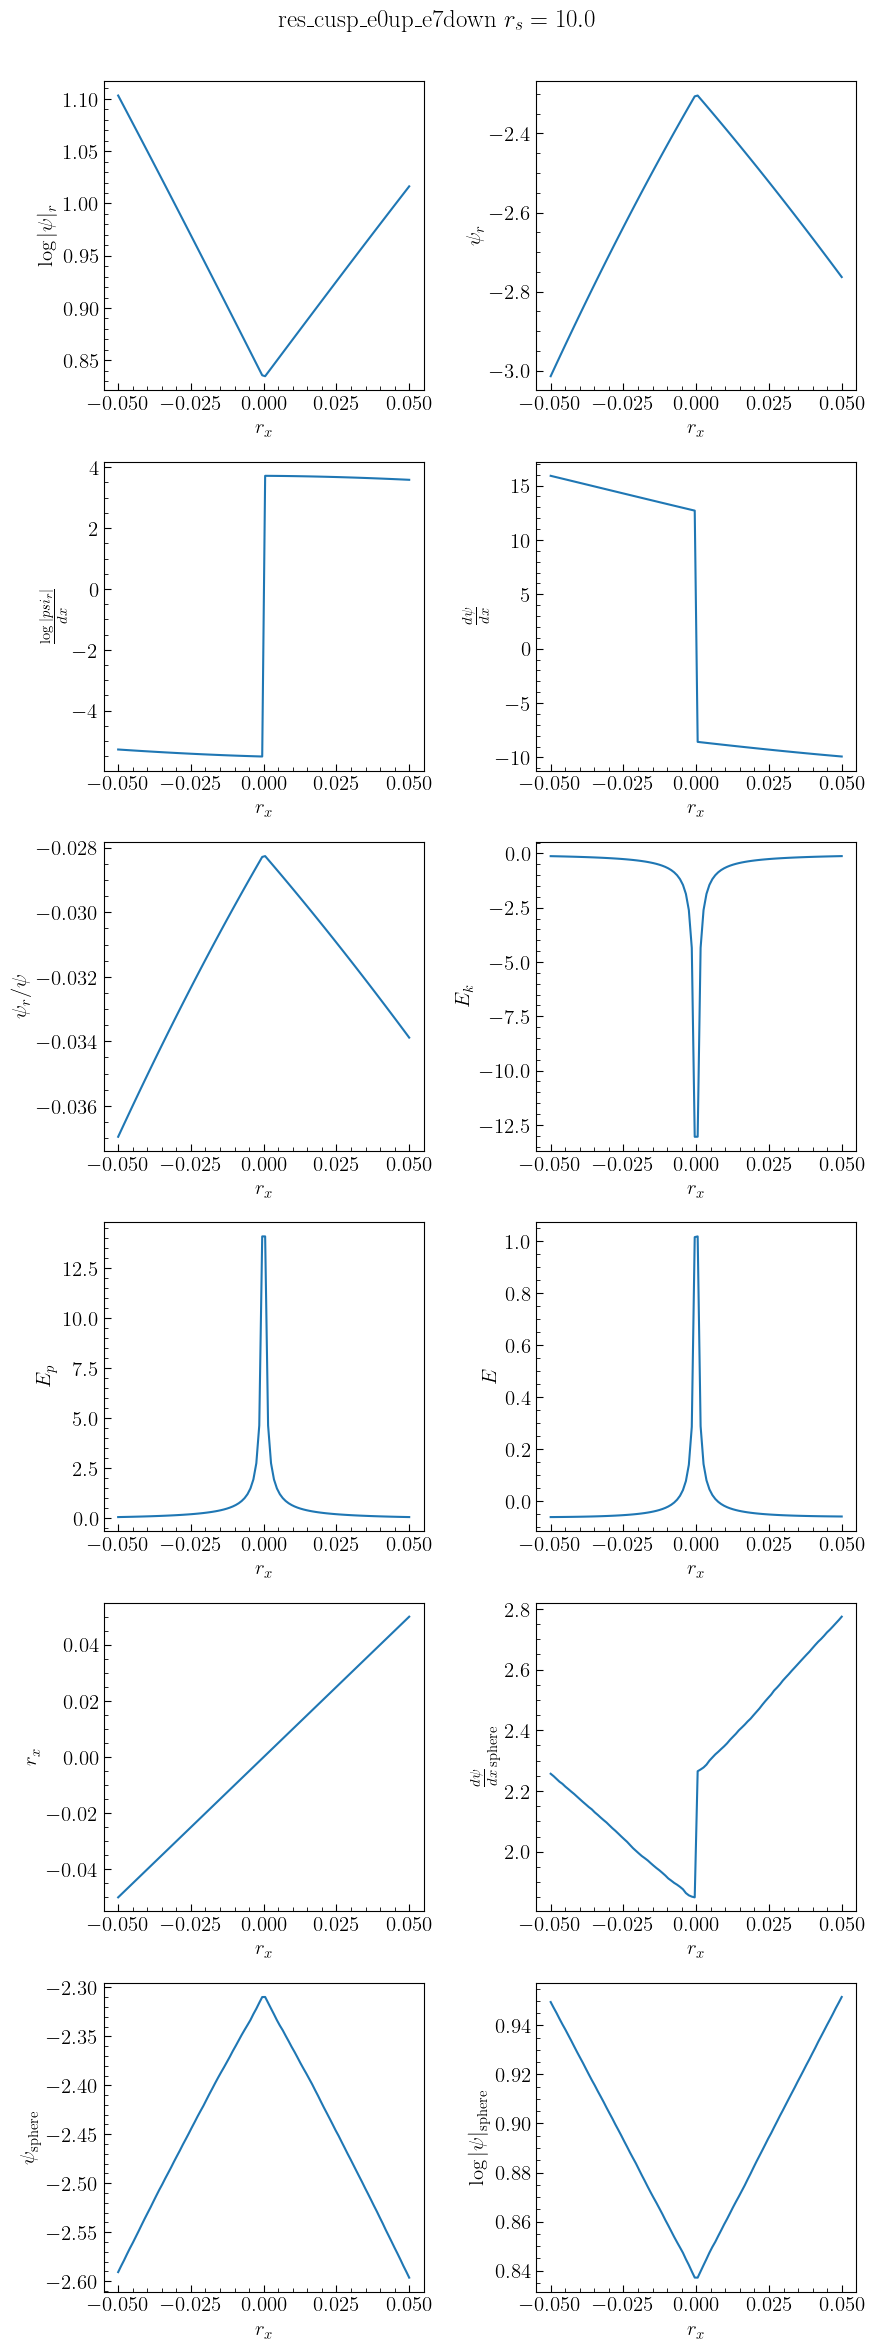

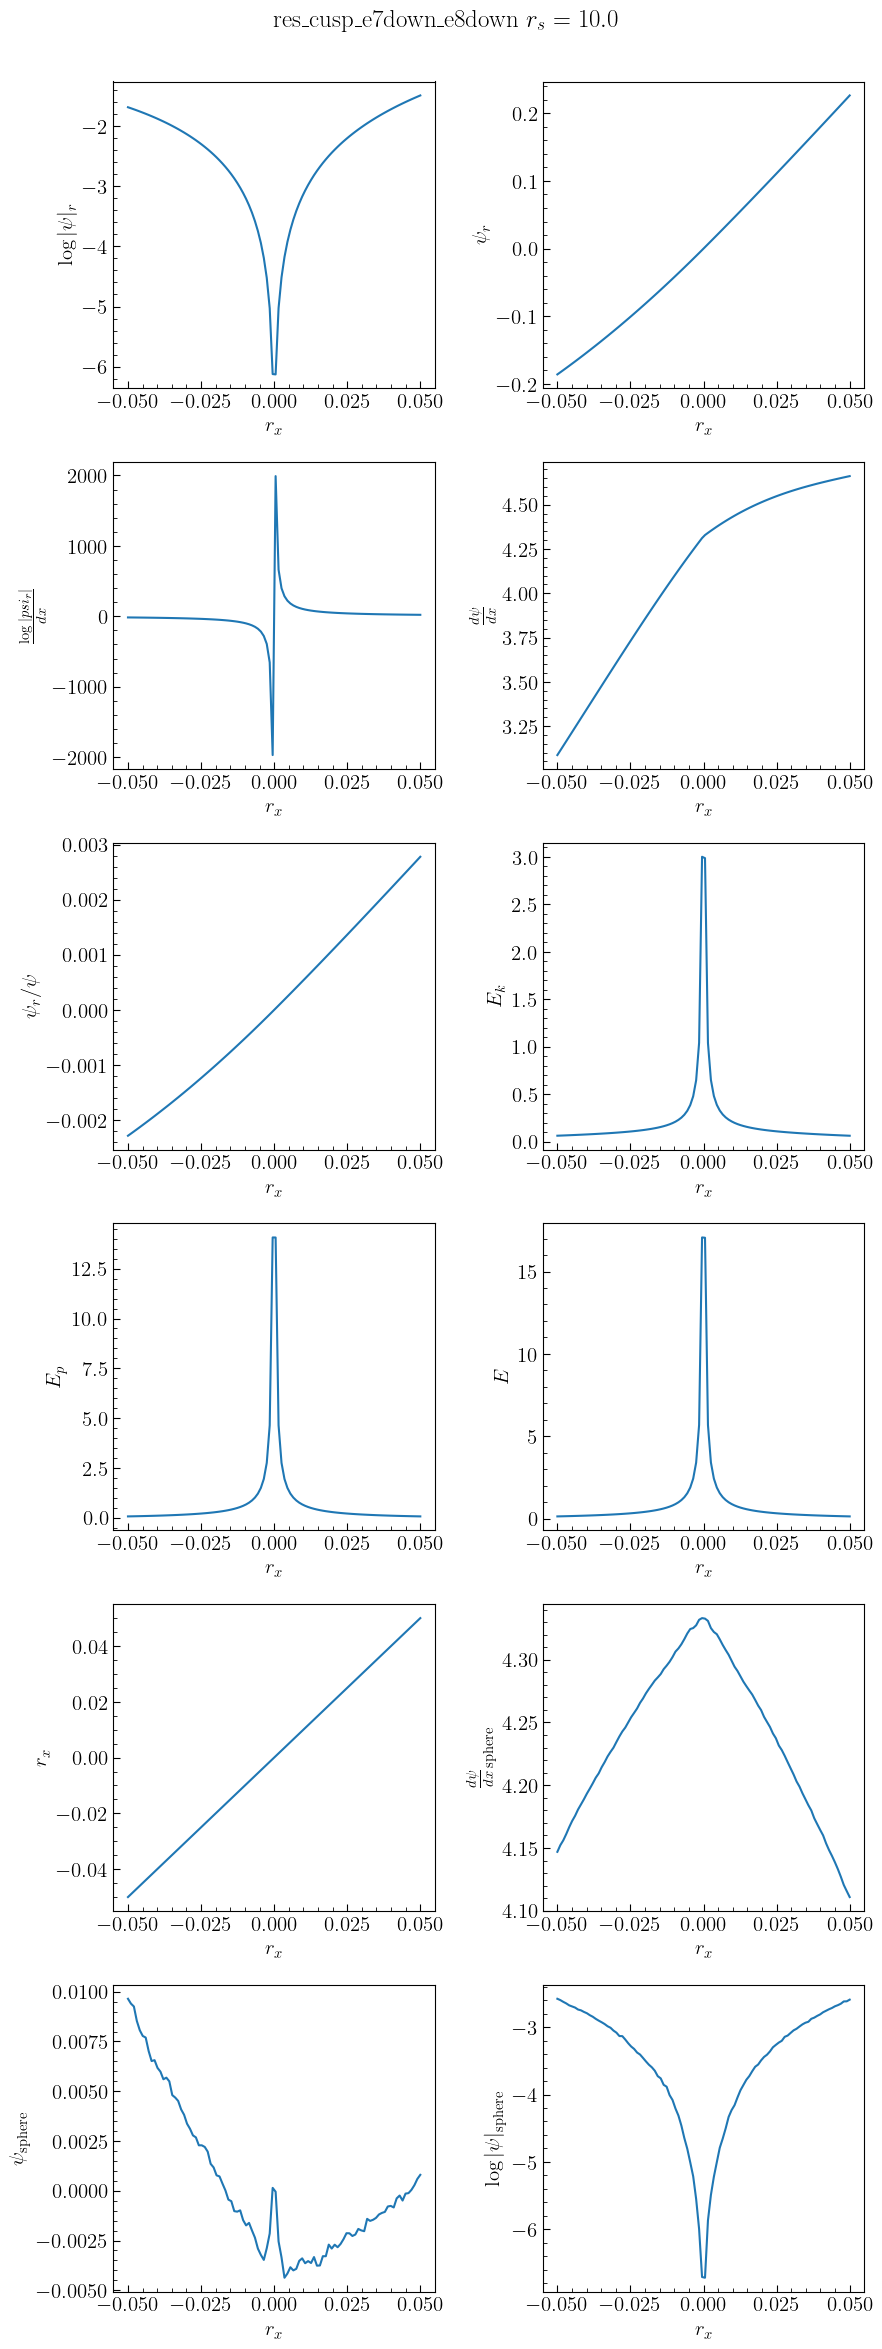

In [22]:
pairs = {
    'log_psi': r'$\log |\psi|_r$',
    'psi': r'$\psi_r$',
    'gx_log_psi': r'$\frac{\log |psi_r|}{dx}$',
    'gx_psi': r'$\frac{d\psi}{dx}$',
    'psip_psi': r'$\psi_r / \psi$',
    'ke': '$E_k$',
    'pe': '$E_p$',
    'e': '$E$',
    'r': '$r_x$',
    'sphere_gx_psi': r'$\frac{d\psi}{dx}_\mathrm{sphere}$',
    'sphere_psi': r'$\psi_\mathrm{sphere}$',
    'sphere_log_psi': r'$\log|\psi|_\mathrm{sphere}$',
}

root = Path(r'C:\Users\max\OneDrive\sisy\hwapnet\src\analysis\PRX_responses\runs\run41035')
plot_dir = mkdir(root.parent / 'results/cusp/plots')
plot_name = 'tmp.png'
n_plots = 12

cfg = load_pk(root / 'config1.pk')
rs = cfg['density_parameter']

e_idxs = [[0, 1], [0, 7], [7, 8]]
ids = {k:'up' for k in range(cfg['n_up'])} | {k:'down' for k in range(cfg['n_up'], cfg['n_el'])}

for e0_idx, e1_idx in e_idxs:
    result_string = f'res_cusp_e{e0_idx}{ids[e0_idx]}_e{e1_idx}{ids[e1_idx]}'

    data = load_pk(root / f'{result_string}.pk')

    fig, axs = plot_setup(usetex=True, figshape=(6, 2), figsize=(4, 4.5))
    axs = iter(axs.flatten())
    parg = PlotArgs()

    for (k, k_l), ax in zip(pairs.items(), axs):
        y = data[k]
        if y.ndim > 1:
            y = np.squeeze(y[..., 0])
        ax.plot(
            data['r'][..., 0, 0], 
            y,
        )

        plot_format(
            ax,
            xlabel=pairs['r'],
            ylabel=pairs[k],
            xlabelpad=4,
            ylabelpad=4,
            # aspect=1.2,
        )

    try:
        [ax.remove() for ax in axs]
    except StopIteration:
        pass
    
    fig.suptitle(result_string + rf' $r_s = {rs}$')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    
    plt.savefig(
        add_name_and_mkdir(plot_dir, result_string+'.png'), 
        dpi = 300, 
        pad_inches = .05, 
        bbox_inches = 'tight'
    )
    
    plt.show()

c:\Users\max\miniconda3\envs\hotseat\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


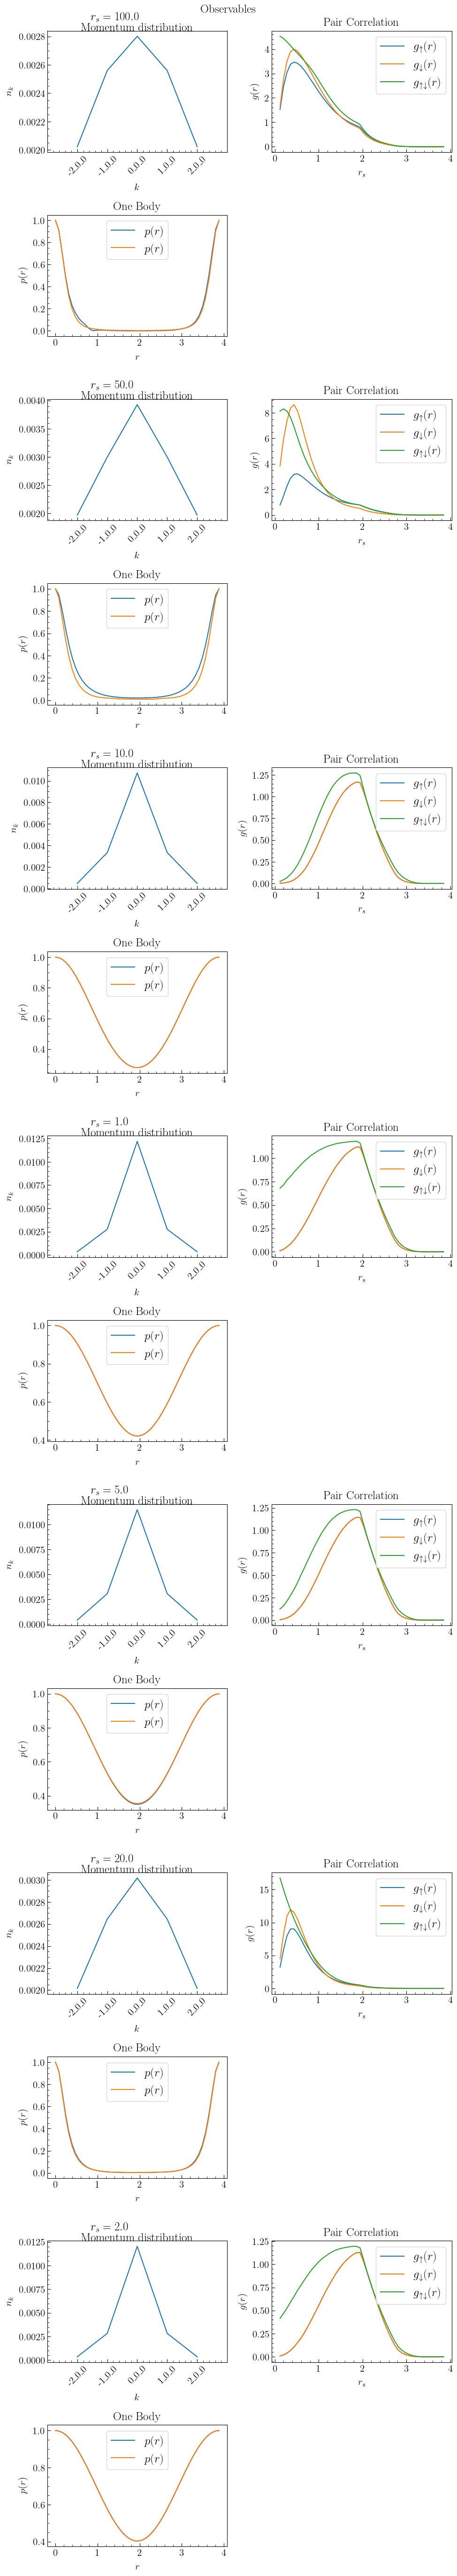

In [25]:
mom_dist_pairs = {
    'kpoints': r'$k$',
    'kpoints_int': 'k_lable',
    'nk': r'$n_k$'

}
pair_corr_pairs = {
    'gr_u': r'$g_{\uparrow}(r)$',
    'gr_d': r'$g_{\downarrow}(r)$',
    'gr_ud': r'$g_{\uparrow\downarrow}(r)$', 
    'rs': r'$r_s$'
}

one_body_pairs = {
    'pr_x_0': r'$p(r)$', 
    'pr_0': r'$r$', 
    'pr_x_7': r'$p(r)$', 
    'pr_7': r'$r$'
}

plot_name = 'tmp.png'
cmap = get_cmap('nice')
run_root = Path(r'C:\Users\max\OneDrive\sisy\hwapnet\src\analysis\PRX_responses\runs')
plot_dir = mkdir(run_root / 'results/obs/plots')

fig, axs = plot_setup(usetex=True, figshape=(7*2, 2), figsize=(4, 5))
axs = iter(axs.flatten())
parg = PlotArgs()

for root in run_root.iterdir():
    if 'run' in str(root.name):
        pairs = mom_dist_pairs
        ax = next(axs)

        cfg = load_pk(root / 'config1.pk')
        rs = cfg['density_parameter']
        
        for run_path in root.iterdir():
            if run_path.name == 'exp_stats_mom_dist_1.pk':
            # if (('mom_dist' in run_path.name) and ('d3' not in run_path.name)):
                p = run_path
            # if 'run' in run_path.name:
                # dict_keys(['kpoints', 'kpoints_int', 'nk'])
                data = load_pk(p)
                y = data['nk']
                x = np.arange(1, len(y)+1)
                
                ax.plot(
                    x, 
                    y
                )


                kpoints_names = np.array(['_'.join([str(i) for i in kpoint]) for kpoint in data['kpoints_int']])

                plot_format(
                    ax,
                    title=rf'$r_s = {rs}$  \\  Momentum distribution',
                    xticks=x,
                    xlim=(0, len(kpoints_names)+1),
                    xlabel='$k$',
                    xticklabels=kpoints_names,
                    ylabel=pairs['nk']
                )
                
        pairs = pair_corr_pairs
        ax = next(axs)
        for run_path in root.iterdir():
            if run_path.name == 'exp_stats_pair_corr_d1.pk':
            # if (('pair_corr' in run_path.name) and ('d3' not in run_path.name)):
                p = run_path
            # if 'run' in run_path.name:
                # dict_keys(['gr_u', 'gr_d', 'gr_ud', 'rs'])
                pc_data = load_pk(p)

                for label in ['gr_u', 'gr_d', 'gr_ud']:
                    
                    ax.plot(
                        pc_data['rs'][1:],
                        pc_data[label][1:]/6, 
                        label=pairs[label]
                    )

                # lim = max([x for x in pc_data[label] if x < 100]) + 1
                plot_format(
                    ax,
                    # ylim=(0, lim),
                    title=rf'Pair Correlation',
                    xlabel=pairs['rs'],
                    ylabel=r'$g(r)$'
                )

                ax.legend()
                
        pairs = one_body_pairs
        ax = next(axs)
        for run_path in root.iterdir():
            if run_path.name == 'exp_stats_one_body_d1.pk':
            # if (('one_body' in run_path.name) and ('d3' not in run_path.name)):
                p = run_path
            # if 'run' in run_path.name:
                # dict_keys(['pr_x_0', 'pr_0', 'pr_x_7', 'pr_7'])
                data = load_pk(p)

                for label in ['pr_x_0', 'pr_x_7']:
                    
                    ax.plot(
                        data[label], 
                        data[f'pr_{label[-1]}'],
                        label=pairs[label]
                    )


                plot_format(
                    ax,
                    title=rf'One Body',
                    xlabel=pairs['pr_0'],
                    ylabel=r'$p(r)$'
                )

                ax.legend()

        next(axs).remove()

# try:
#     [ax.remove() for ax in axs]
# except StopIteration:
#     pass

fig.suptitle('Observables')
fig.tight_layout()
fig.subplots_adjust(top=0.97)

plt.savefig(
    add_name_and_mkdir(plot_dir, 'observables.png'), 
    dpi = 300, 
    pad_inches = .05, 
    bbox_inches = 'tight'
)

plt.show()

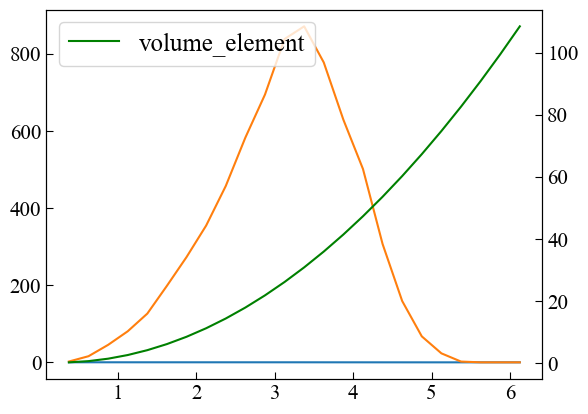

rs [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ]
vol el [6.54498469e-02 4.58148929e-01 1.24354709e+00 2.42164434e+00
 3.99244066e+00 5.95593607e+00 8.31213056e+00 1.10610241e+01
 1.42026168e+01 1.77369085e+01 2.16638993e+01 2.59835892e+01
 3.06959782e+01 3.58010663e+01 4.12988534e+01 4.71893397e+01
 5.34725250e+01 6.01484093e+01 6.72169928e+01 7.46782754e+01
 8.25322570e+01 9.07789377e+01 9.94183175e+01 1.08450396e+02]


In [109]:
plt.rcParams['text.usetex'] = False

n_walkers = 1000
scale = 3.
volume = scale**3
vecs = np.random.uniform(-scale, scale, size=(n_walkers, 7, 7, 3))
distances = np.linalg.norm(vecs, axis=-1)

n_points = 25
rs = np.linspace(0, scale*2, n_points)
# rs = rs[1:]
# n_points = len(rs)
n_ri, n_rj = distances.shape[1:]  # number of reference particles, number target
number_density = n_rj / volume  # is the number density n_ri or 

volume_element = (4.*np.pi/3.) * (rs[1:]**3 - rs[:-1]**3)
hist = np.histogramdd(distances.reshape(-1, 1), bins=n_points-1, range=[(0, rs[-1]),])[0] / n_ri

pdf = hist / (n_walkers * volume_element * number_density)

rs_x = rs[1:] + (rs[1:] - rs[:-1])/2.
fig, ax = plt.subplots(1, 1)
ax.plot(rs_x, pdf, label='pdf')
ax.plot(rs_x, hist, label='hist')
# ax.set_ylim(0, 1000)
# ax.set_ylim(0, 1)
ax2 = ax.twinx()
ax2.plot(rs_x, volume_element, label='volume_element', color='green')

plt.legend()
plt.show()
# pdfs = []
# for i, r in enumerate(rs):
#     r0 = rs[i]
#     r1 = rs[i+1]
#     counts = float(jnp.sum((r0<=distances)*(distances<=r1))) / n_ri
#     volume_element = (4.*np.pi/3.) * (r1**3 - r0**3)
#     # volume = 4.* np.pi * r0**2 * dr  # less accurate
#     pdf = counts / (n_walkers * volume_element * number_density)
#     pdfs.append(pdf)

print('rs', rs)
print('vol el', volume_element)


In [102]:
hist

array([1.000e+00, 3.000e+01, 6.800e+01, 1.390e+02, 2.640e+02, 3.260e+02,
       5.120e+02, 6.460e+02, 8.230e+02, 1.050e+03, 1.235e+03, 1.529e+03,
       1.623e+03, 1.328e+03, 1.132e+03, 8.290e+02, 5.940e+02, 2.530e+02,
       1.280e+02, 3.200e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [ ]:
exp_path = ''

datapaths = ['']

d = {}
for datapath in datapaths:
    tmp = load_pk(datapath)
    d = append_to_dict() 

fig, ax, args = plot_setup()
parg = PlotArgs()

plt.legend()
plt.xlabel('$x$', labelpad = parg.labelpad)
plt.ylabel('$\phi$', labelpad = parg.labelpad)
plt.savefig('professional_plot.png', dpi = parg.dpi, pad_inches = parg.pad_inches, bbox_inches = parg.bbox_inches)
exp_path = '/home/energy/amawi/projects/nn_ansatz/src/experiments/HEG_PRX/bf_af_0'

paths = get_all_name_from_dir(exp_path)
cfgs = [load_pk(f) for f in paths]

sweep_hyperparams = {'bf_af': ['tanh', 'sin', 'cos', 'silu', 'snake']}

target = 'e_mean_i100000'

summary = []
for k, v in sweep_hyperparams.items():
    for a in v:
        vals = []
        for cfg in cfgs:
            if cfg[k] == a:
                if target in cfg.keys():
                    val = cfg[target]
                    vals.append(val)
        print('n_seeds: ', len(vals))
        summary.append([a, np.mean(vals), np.std(vals)])

summary = pd.DataFrame(summary, columns=['activation', 'E', 'std'])

summary.plot(x='activation', y='E', yerr='std', kind='scatter', title='Activation investigation mean performance over 2 seeds')


# Plot pretty cusp 
import matplotlib.pyplot as plt
from matplotlib import cm

cmap = cmaps['sequential']['viridis']

path = './HEG/final1001/14el/baseline/kfac_1lr-3_1d-4_1nc-4_m2048_el14_s128_p32_l3_det1/run41035/results.pk'

def ojm(*args):
    path = os.path.join(*args)
    has_filename = '.' in path.split('/')[-1]
    if has_filename: path = '/'.join(path.split('/')[:-1])
    os.makedirs(path, exist_ok=True)
    return path

e_idxs = [[0, 7],]

for e0_idx, e1_idx in e_idxs:

    data = load_pk(path)[f'e{e0_idx}_e{e1_idx}']
    z = data['psi']
    y = data['grid'][:, 1]
    x = data['grid'][:, 0]

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    n = int(np.sqrt(len(x)))
    x = x.reshape((n, n))
    y = y.reshape((n, n))
    z = z.reshape((n, n))
    surf = ax.plot_surface(x, y, z, 
                            cmap=cmap,
                            linewidth=0, 
                            antialiased=False)

    # ax.set_zlim(*zlim)
    # ax.zaxis.set_major_locator(LinearLocator(nz_major)) # set the number a major ticks
    # ax.zaxis.set_minor_locator(LinearLocator(0)) # set the number of minor ticks
    # ax.zaxis.set_major_formatter('{x:.02f}') # format the tick labels

    fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.1) # Add a color bar which maps values to colors.

    ax.set_xlabel(r'$x_{coor}$', labelpad=10)
    ax.set_ylabel(r'$y_{coor}$', labelpad=10)
    ax.set_zlabel(r'$\psi(R)$', labelpad=10)

    ax.view_init(30, 30)

    fig.savefig(ojm('./downloads/060922/cusp.svg'))

    plt.show()